# Part 3: Data Analytics

## Step 1: Select a real-world dataset

For this part of the coursework, it was my job to find a dataset that contained at least 5 columns and 150 rows on a subject of my choice. Due to the effect of the pandemic on the mental health of societies worldwide, I felt that it would be interesting to investigate the world happiness index of 2020. In this research project, I am going to analyse and test some hypotheses that I have about the data that I have found. 

I found my dataset on Kaggle, url = https://www.kaggle.com/mathurinache/world-happiness-report.

This data set comprises of 20 columns and 153 rows. There are two columns, 'Country Name' and 'Regional Indicator' whose content comprise of strings (nominal data) and the rest of the columns comprise of numerical data. The csv file is ordered as a rank from the country with the highest happiness index to the country with the lowest.  A proportion of the columns give numerical values that represent a part of society that contributes to making it happy or sad. Examples include 'logged GDP per capita', 'Healthy life expectancy', 'Perceptions of corruption', etc. The other proportion of columns include 'upperwhisker' and 'lowerwhisker' of boxplots, 'standard error of ladder score' and these types of columns include statistical information that we will be using throughout this analysis. 

Countries and regions are going to be two variables that are going to be interesting to see. It is going to be crucial to discover whether there is any correlation about what region you are in and whether that has any correlation to your ranking. More variables of interest are of course life expectancy, perceptions of corruption and freedom. It will be interesting to see if there are any patterns in the data that we can explore further.

As explained earlier, I found this dataset on kaggle, the hyperlink to the original webpage is above. I downloaded the zip file that this dataset was stored in, and then uploaded the 2020.csv file onto Jupyter. 

In [11]:
#Firstly, I need to import all the Python libraries that I will be using... I am sure there will be more to install.
import csv
import pandas as pd
import numpy as np
import scipy as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Step 2: Perform data preparation & cleaning

I am going to load my csv file into a dataframe using Pandas.

In [4]:
df=pd.read_csv('2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
len(df) #Number of rows

153

In [6]:
len(df.columns) #Number of columns

20

I am going to use the describe function to give me the count, mean, standard deviation, minimum, quartiles and maximum values of the data in each column of our chosen dataframe. 

In [7]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


I am going to show the first ten and last ten columns of my dataframe, using ```df.head(10)``` and ```df.tail(10)```.

In [8]:
df.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [9]:
df.tail(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
143,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043,1.972317,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588,0.734131
144,Malawi,Sub-Saharan Africa,3.5380,0.070261,3.675711,3.400290,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701,1.972317,0.176535,0.530368,0.446163,0.487390,0.213185,0.131634,1.552718
145,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473
146,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241
147,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


## Step 3: Perform exploratory analysis and ask questions

Firstly, I am going to explore distributions of numeric columns of my dataframe.

(array([11., 26., 37., 28., 29., 13.,  5.,  1.,  1.,  2.]),
 array([-0.30090737, -0.21475024, -0.1285931 , -0.04243596,  0.04372118,
         0.12987831,  0.21603545,  0.30219259,  0.38834972,  0.47450686,
         0.560664  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

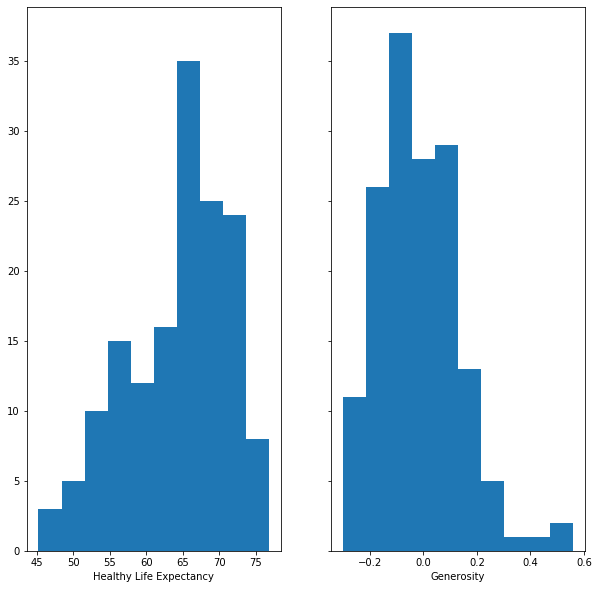

In [28]:
fig = plt.figure()
fig, (ax0,ax1)=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,10))
ax0.set_xlabel("Healthy Life Expectancy")
ax1.set_xlabel("Generosity")
ax0.hist(df['Healthy life expectancy'])
ax1.hist(df['Generosity'])

In [ ]:
df1 = df.head(10)
countries = df1['Country name']
xs = range(len(countries))
plt.bar(xs,df1['Healthy life expectancy'])
plt.xticks(np.arange(0,10,step=0.00001))
plt.xticks(xs,countries)
plt.ylabel('Healthy Life Expectancy')
plt.xlabel('Top Ten Happiest Countries')